# Linear Regression Analysis on Number of Birth and TFR

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [51]:
# Retreiving dataset
df = pd.read_excel('TFR.xlsx', skiprows=2, nrows=2, index_col=0)
df

,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Number of Birth,966.00,923.00,874.00,796.0,825.00,751.00,863.0,863.00,867.00,848.00,...,435.400,438.400,406.200,357.800,326.800,302.700,272.300,260.600,249.10,230.00
Total Fertility Rate,4.07,3.77,3.43,3.0,2.99,2.64,2.9,2.82,2.57,2.39,...,1.205,1.239,1.172,1.052,0.977,0.918,0.837,0.808,0.78,0.72


In [53]:
# Transposing index and columns
df = df.T
df.head()

,Number of Birth,Total Fertility Rate
1973,966.0,4.07
1974,923.0,3.77
1975,874.0,3.43
1976,796.0,3.00
1977,825.0,2.99


In [55]:
# Converting index to numeric values
df.index = df.index.astype(int)

In [57]:
# Reshaping into 2D input
X = np.array(df.index).reshape(-1, 1)
y_birth = df['Number of Birth']
y_tfr = df['Total Fertility Rate']

In [59]:
# Creating linear regression models
model_birth = LinearRegression()
model_tfr = LinearRegression()

In [61]:
# Fitting models
model_birth.fit(X, y_birth)
model_tfr.fit(X, y_tfr)

LinearRegression()

In [63]:
# Predicting future values 
future_years = np.array(range(df.index.max() + 1, df.index.max() + 11)).reshape(-1, 1)
predicted_births = model_birth.predict(future_years)
predicted_tfr = model_tfr.predict(future_years)

In [65]:
# Print predictions
print("Future predictions for Number of Births:", predicted_births)
print("Future predictions for TFR:", predicted_tfr)

Future predictions for Number of Births: [272.02815686 259.72569532 247.42323379 235.12077225 222.81831071
 210.51584917 198.21338763 185.91092609 173.60846456 161.30600302]
Future predictions for TFR: [0.48419137 0.43867762 0.39316386 0.34765011 0.30213635 0.25662259
 0.21110884 0.16559508 0.12008133 0.07456757]


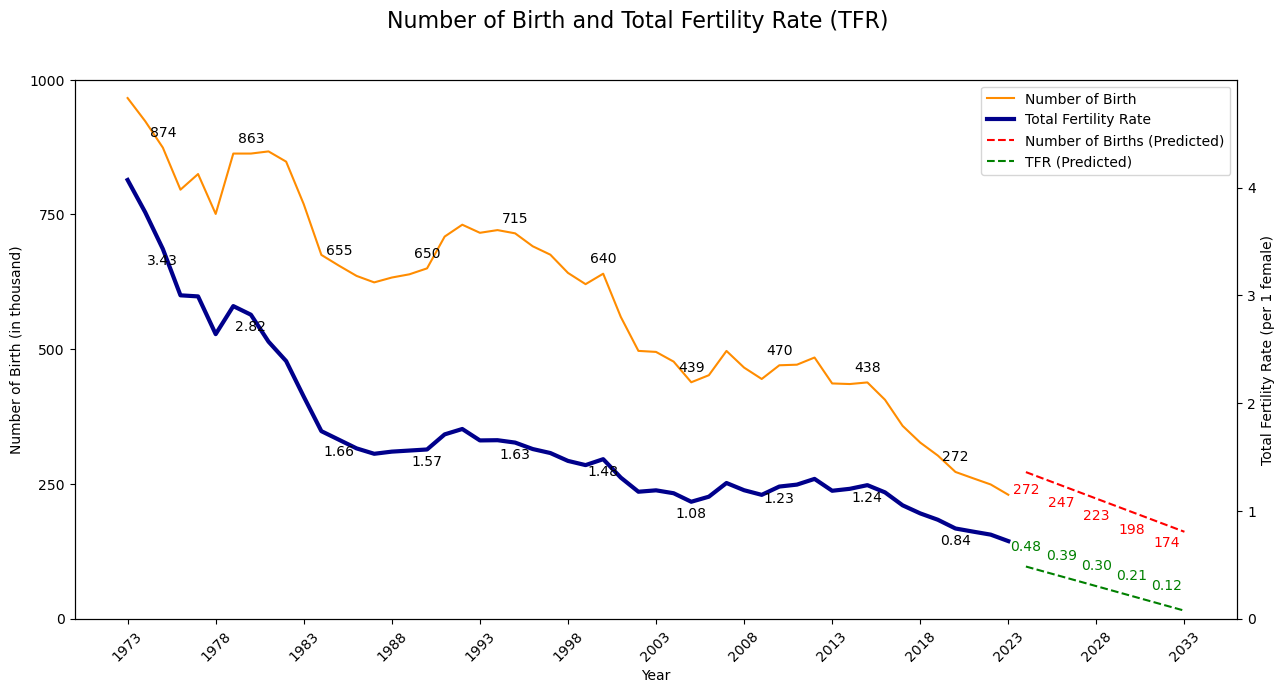

In [67]:
fig, ax1 = plt.subplots(figsize=(15, 7))
fig.suptitle('Number of Birth and Total Fertility Rate (TFR)', fontsize = 16)

# Plot for Number of Birth
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Birth (in thousand)')
ax1.set_ylim(0, 1000)
ax1.set_yticks([0,250, 500, 750, 1000])
line1 = ax1.plot(df.index, df['Number of Birth'], color='darkorange', label='Number of Birth')

# Annotations for Number of Birth
for x_val, y_val in zip(df.index, df['Number of Birth']):
    if x_val % 5 == 0:
        ax1.text(x_val, y_val + 20, f'{y_val:.0f}', ha='center')

# Twin axis for Total Fertility Rate
ax2 = ax1.twinx()
ax2.set_ylabel('Total Fertility Rate (per 1 female)')
ax2.set_ylim(0, 5)
ax2.set_yticks([0, 1, 2, 3, 4])

# Plot for Total Fertility Rate
line2 = ax2.plot(df.index, df['Total Fertility Rate'], color='darkblue', lw=3, label='Total Fertility Rate')

# Annotations for Total Fertility Rate
for x_val, y_val in zip(df.index, df['Total Fertility Rate']):
    if x_val % 5 == 0:
        ax2.text(x_val, y_val - 0.15, f'{y_val:.2f}', ha='center')

# Set x-ticks to show every 5th year (adjust according to your data)
plt.xticks(df.index[::5])

# Predicted data plots (corrected to use ax1 and ax2)
line3 = ax1.plot(future_years, predicted_births, linestyle='--', color='red', label='Number of Births (Predicted)')
line4 = ax2.plot(future_years, predicted_tfr, linestyle='--', color='green', label='TFR (Predicted)')

# Annotations for predicted values
for x_val, y_val in zip(future_years.flatten(), predicted_births):
    if x_val % 2 == 0:
        ax1.text(x_val, y_val - 40, f'{y_val:.0f}', ha='center', color='red')

for x_val, y_val in zip(future_years.flatten(), predicted_tfr):
    if x_val % 2 == 0:
        ax2.text(x_val, y_val + 0.15, f'{y_val:.2f}', ha='center', color='green')

# Combine historical and future years for x-axis
all_years = np.concatenate([df.index, future_years.flatten()])

# Determine x-ticks at 5-year intervals
x_ticks = np.arange(min(all_years), max(all_years) + 1, 5)

# Set x-ticks to show every year for better clarity
ax1.set_xticks(x_ticks)  # Adjust step size if needed
ax1.set_xticklabels([f'{int(year)}' for year in x_ticks], rotation=45)

# Combine lines and labels for the legend
lines = line1 + line2 + line3 + line4
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='best')

plt.savefig("Linear Regression Analysis.png", dpi=100)

# Show the plot
plt.show()

